In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
cancer_data = load_breast_cancer()

# Create a pandas DataFrame for easier exploration
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nTarget Distribution:")
print(df['target'].value_counts()) # 0 = malignant, 1 = benign

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

In [2]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
# SVMs are sensitive to the scale of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)


In [3]:
# Create and train the SVM model
# We use a radial basis function (rbf) kernel, which is a good default
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("SVM Model trained successfully!")

SVM Model trained successfully!


Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       1.00      0.95      0.98        43
   Benign (1)       0.97      1.00      0.99        71

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114


Confusion Matrix:


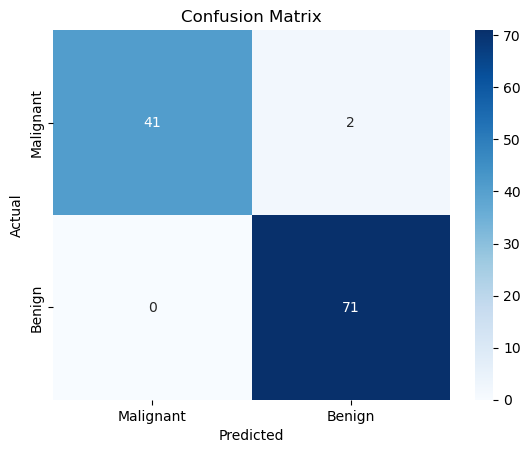

In [4]:
# Make predictions on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)']))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()